# The Slowdown Problem
Regina Ceballos Mondragón

147663

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

## Data Creation and Model Training
For this exercise, I will use the same neural network for the data inside and outside a circle as we already know it works. I will compare the weights in the hidden layers and in the output layer. The slowdown problem with this network will cause the first hidden layer to have a smaller learning rate. 

In [2]:
n = 1000
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))

In [3]:
def circ(X1, X2):
    if X1*X1 + X2*X2 < 1:
        return 1
    else:
        return 0

In [4]:
X = np.concatenate((X1, X2), axis = 1)
Y = np.resize([circ(X1[i], X2[i]) for i in range(len(X1))], (n,1))

## Sigmoid

In [5]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
b1 = tf.Variable(tf.zeros([1, 3]))
W2 = tf.Variable(tf.random_uniform([3, 3], -1, 1))
b2 = tf.Variable(tf.zeros([1, 3]))
W3 = tf.Variable(tf.random_uniform([3, 1], -1, 1))
b3 = tf.Variable(tf.zeros([1, 1]))

In [6]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
h1 = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
yhat = tf.nn.sigmoid(tf.matmul(h1, W3) + b3)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In each training step, I will save the first element of the weights of each layer and after the training is completed, I will compare the rate of change of the weights.

In [7]:
w1 = []
w2 = []
w3 = []
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(1000):
    sess.run(train_step, feed_dict={x: X, y: Y})
    w1.append(sess.run(W1[0, 0]))
    w2.append(sess.run(W2[0, 0]))
    w3.append(sess.run(W3[0, 0]))

In [8]:
w1 = np.resize(w1, (1000, 1))
w2 = np.resize(w2, (1000, 1))
w3 = np.resize(w3, (1000, 1))

In [9]:
cw1 = w1[0:999] - w1[1:1000]
cw2 = w2[0:999] - w2[1:1000]
cw3 = w3[0:999] - w3[1:1000]
cpw1 = np.mean(cw1, axis=0)
cpw2 = np.mean(cw2, axis=0)
cpw3 = np.mean(cw3, axis=0)

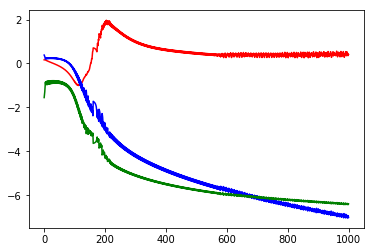

In [10]:
plt.plot([i for i in range(1000)], w1, c='red')
plt.plot([i for i in range(1000)], w2, c='blue')
plt.plot([i for i in range(1000)], w3, c='green')
plt.show()

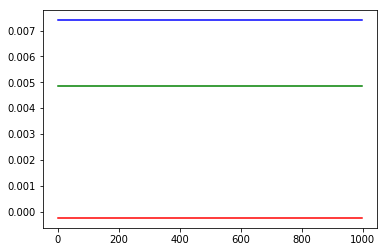

In [11]:
plt.plot([i for i in range(999)], [cpw1 for i in range(999)], c='red')
plt.plot([i for i in range(999)], [cpw2 for i in range(999)], c='blue')
plt.plot([i for i in range(999)], [cpw3 for i in range(999)], c='green')
plt.show()

The graphs above show weigths in each iteration and the average change of the weights. The red line correponds to the  first hidden layer. Clearly, the first hidden layer has a much slower learning rate than the rest of the layers.

## Tanh

In [12]:
h = tf.nn.tanh(tf.matmul(x, W1) + b1)
h1 = tf.nn.tanh(tf.matmul(h, W2) + b2)
yhat = tf.nn.tanh(tf.matmul(h1, W3) + b3)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [13]:
w1 = []
w2 = []
w3 = []
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(1000):
    sess.run(train_step, feed_dict={x: X, y: Y})
    w1.append(sess.run(W1[0, 0]))
    w2.append(sess.run(W2[0, 0]))
    w3.append(sess.run(W3[0, 0]))

In [14]:
w1 = np.resize(w1, (1000, 1))
w2 = np.resize(w2, (1000, 1))
w3 = np.resize(w3, (1000, 1))

In [15]:
cw1 = w1[0:999] - w1[1:1000]
cw2 = w2[0:999] - w2[1:1000]
cw3 = w3[0:999] - w3[1:1000]
cpw1 = np.mean(cw1, axis=0)
cpw2 = np.mean(cw2, axis=0)
cpw3 = np.mean(cw3, axis=0)

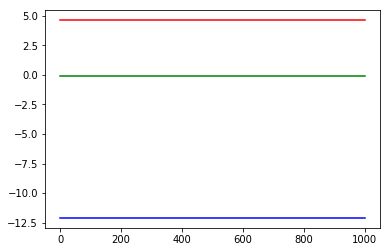

In [25]:
plt.plot([i for i in range(1000)], w1, c='red')
plt.plot([i for i in range(1000)], w2, c='blue')
plt.plot([i for i in range(1000)], w3, c='green')
plt.show()

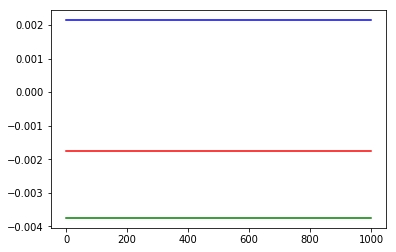

In [17]:
plt.plot([i for i in range(999)], [cpw1 for i in range(999)], c='red')
plt.plot([i for i in range(999)], [cpw2 for i in range(999)], c='blue')
plt.plot([i for i in range(999)], [cpw3 for i in range(999)], c='green')
plt.show()

With this activation function, there is no change in the variables

## ReLu

In [18]:
h = tf.nn.relu(tf.matmul(x, W1) + b1)
h1 = tf.nn.relu(tf.matmul(h, W2) + b2)
yhat = tf.nn.relu(tf.matmul(h1, W3) + b3)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [19]:
w1 = []
w2 = []
w3 = []
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(1000):
    sess.run(train_step, feed_dict={x: X, y: Y})
    w1.append(sess.run(W1[0, 0]))
    w2.append(sess.run(W2[0, 0]))
    w3.append(sess.run(W3[0, 0]))

In [20]:
w1 = np.resize(w1, (1000, 1))
w2 = np.resize(w2, (1000, 1))
w3 = np.resize(w3, (1000, 1))

In [21]:
cw1 = w1[0:999] - w1[1:1000]
cw2 = w2[0:999] - w2[1:1000]
cw3 = w3[0:999] - w3[1:1000]
cpw1 = np.mean(cw1, axis=0)
cpw2 = np.mean(cw2, axis=0)
cpw3 = np.mean(cw3, axis=0)

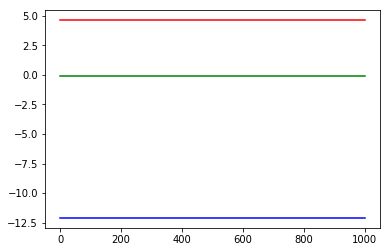

In [22]:
plt.plot([i for i in range(1000)], w1, c='red')
plt.plot([i for i in range(1000)], w2, c='blue')
plt.plot([i for i in range(1000)], w3, c='green')
plt.show()

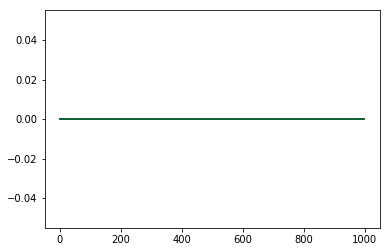

In [23]:
plt.plot([i for i in range(999)], [cpw1 for i in range(999)], c='red')
plt.plot([i for i in range(999)], [cpw2 for i in range(999)], c='blue')
plt.plot([i for i in range(999)], [cpw3 for i in range(999)], c='green')
plt.show()

With this function also has no change.